# Data Analysis

In [1]:
import pandas as pd
import os
import os.path
import json
import sqlalchemy as sa

import matplotlib.pyplot as plt

%run data_acquisition.ipynb

"""
the data acquisition notebook closes the connection to sqlite 
so opening it in this notebook is the first step

"""

(779, 6)
(348, 2)
348
Connection string: sqlite:///./foraging.db


'\nthe data acquisition notebook closes the connection to sqlite \nso opening it in this notebook is the first step\n\n'

In [2]:
"""
OPEN CONNECTION
"""

cstring = buildConnectionString(source = "sqlite_foraging")
print("Connection string:", cstring)


engine = sa.create_engine(cstring)
connection = engine.connect()

Connection string: sqlite:///./foraging.db


Q1: This query selects observations grouped by genus/species of plants, therefore finding the number of times each plant has been observed

This give a rough estimate of which plants are more commonly found or which plants more people seem to identify or are curious about

In [3]:
query1 = """
SELECT  genname as genus, species, comname, COUNT(ROWID) as observationcount
FROM observations
WHERE genname != 'None'
GROUP BY genus, species
ORDER BY observationcount DESC
"""


result1 = pd.read_sql_query(query1, connection)

result1.head(5)


,genus,species,comname,observationcount
0,Flammulina,velutipes,Velvet Foot,5
1,Symplocarpus,foetidus,Eastern Skunk Cabbage,5
2,Ficaria,verna,Lesser Celandine,4
3,Carex,None,True Sedges,3
4,Galerina,marginata,Funeral Bell,3


This query finds the species that are able to be used as tea and were observed in the Granville area

In [4]:
query2 = """

SELECT p.tea, o.genname, o.species, o.comname, p.edibility, p.medicinal,
COUNT(o.ROWID) AS observationcount

FROM plants as p RIGHT JOIN observations as o
    ON o.genname = p.genname AND
     o.species = p.species
 
WHERE o.genname != 'None' AND p.tea = 'True'
GROUP BY o.genname, o.species
ORDER BY observationcount DESC
"""

result2 = pd.read_sql_query(query2, connection)

result2.head(6)


,tea,genname,species,comname,edibility,medicinal,observationcount
0,True,Glechoma,hederacea,Ground-Ivy,2,3,2
1,True,Mitchella,repens,Partridgeberry,3,3,2
2,True,Chimaphila,maculata,Striped Wintergreen,1,3,1
3,True,Galium,aparine,Catchweed Bedstraw,2,3,1
4,True,Ilex,opaca,American Holly,2,2,1
5,True,Sambucus,canadensis,American Black Elderberry,4,3,1


This query counts the number of species within each genus that can be used as tea

<function matplotlib.pyplot.show(close=None, block=None)>

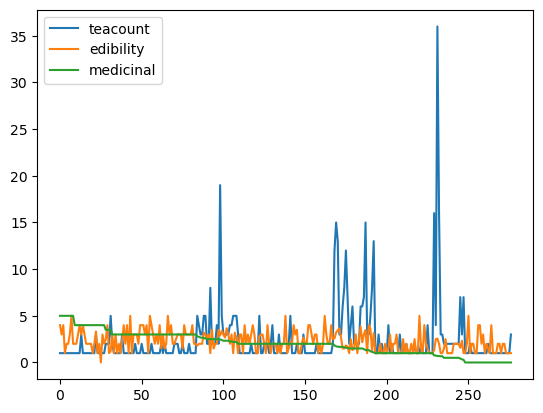

In [5]:
query3 = """
SELECT  p.genname as genus, g.gencomname as commonname, COUNT(tea) as teacount, 
ROUND(AVG(p.edibility),2) as edibility, ROUND(AVG(p.medicinal),2) as medicinal
FROM plants as p INNER JOIN genus as g
    ON p.genname = g.genname
WHERE tea = 'True'
GROUP BY genus
ORDER BY medicinal DESC
"""

result3 = pd.read_sql_query(query3, connection)

result3.plot()
plt.show

Dataframes was used to process data by allowing me to create complex views of data without having to write them as a table  or created a subquery inorder to be referenced. Initially, I really wanted to do everything in SQL as the syntax and thought process behind the queries made much more sense to me. However, the flexibility with dataframes is really useful albeit tricky to navigate all the funtionality.

In [6]:
result3.sort_values(by = 'teacount', ascending = False).head(10)

,genus,commonname,teacount,edibility,medicinal
231,Viola,Violets,36,2.56,0.69
98,Mentha,Horsemint,19,2.89,2.47
232,Picea,Spruce,16,2.00,0.69
229,Taraxacum,Dandelion,16,1.31,0.75
187,Rubus,Blackberry,15,3.47,1.33
169,Prunus,Blackthorn,15,3.20,1.73
170,Tilia,Basswood,13,3.46,1.69
192,Vaccinium,Bilberry,13,3.15,1.08
168,Rosa,Rose,12,2.58,1.83
175,Salvia,Clary,12,1.83,1.58


# Central Question Answer

1) The data collected from inaturalist surrounding Granville is very limited and can not really even give an idea of abundance or biodiversity of the area. Especially as I only scraped from the first two pages that included other types of flora and fauna. I was suprised to see that the most the same plant was only observed 5 times. However, I think that I need to add a little more logic behind the matches of genus and species to ensure specificity but also not exclude any matches of only genus.

2) I was happy to find that 5 out of the 154 observations were found on the tea database. This means nearly guaranteed tea in my mind

3) It was also really cool to plot the number of species found within each genus against the average edibility and medicinal properties of a plant. I had hypothesized that maybe scientists are more likely to study and find more plants within the same genus if their edibility or medical properties are significant. Especially with medicinal qualities, it kind of looks like the oppositve of my prediction even though the graph really doesn't seem to have much of a trend. 

4) Lastly, I will be trying to find violets, spruce, and dandelions to make tea out of this summer. I feel like my odds are a bit higher of not food poisoning myself if there is a greater likelihood that more things in its genus are able to made into tea. The last dataset shows genuses sorted by the number of species they contain that can be used as tea according to the pfaf website.
